In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

### Get data using yfinance

In [18]:
ticker_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start_date = '2019-01-01'
end_date = '2024-01-01'

In [20]:
historical_data = {}
for ticker_symbol in ticker_symbols:
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(start=start_date, end=end_date)
    historical_data[ticker_symbol] = data

In [21]:
historical_data['AMZN'].columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [22]:
historical_data['AMZN']

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,153.770004,154.350006,152.710007,153.419998,29480100
2023-12-26 00:00:00-05:00,153.559998,153.979996,153.029999,153.410004,25067200
2023-12-27 00:00:00-05:00,153.559998,154.779999,153.119995,153.339996,31434700


In [5]:
amzn_df = historical_data['AMZN']
amzn_df[amzn_df.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,


In [6]:
amzn_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.000000
mean,127.676453,129.237913,126.017538,127.649705,7.577451e+07,0.0,0.015898
std,31.302898,31.588691,30.921004,31.209475,3.352033e+07,0.0,0.563884
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.000000
25%,95.602253,96.687374,94.459248,95.441999,5.333952e+07,0.0,0.000000
50%,127.369999,129.035004,125.350002,127.125000,6.636065e+07,0.0,0.000000
75%,158.346878,159.930752,156.224998,158.093746,8.853550e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


In [7]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


### Plot 4 graphs of Close prices

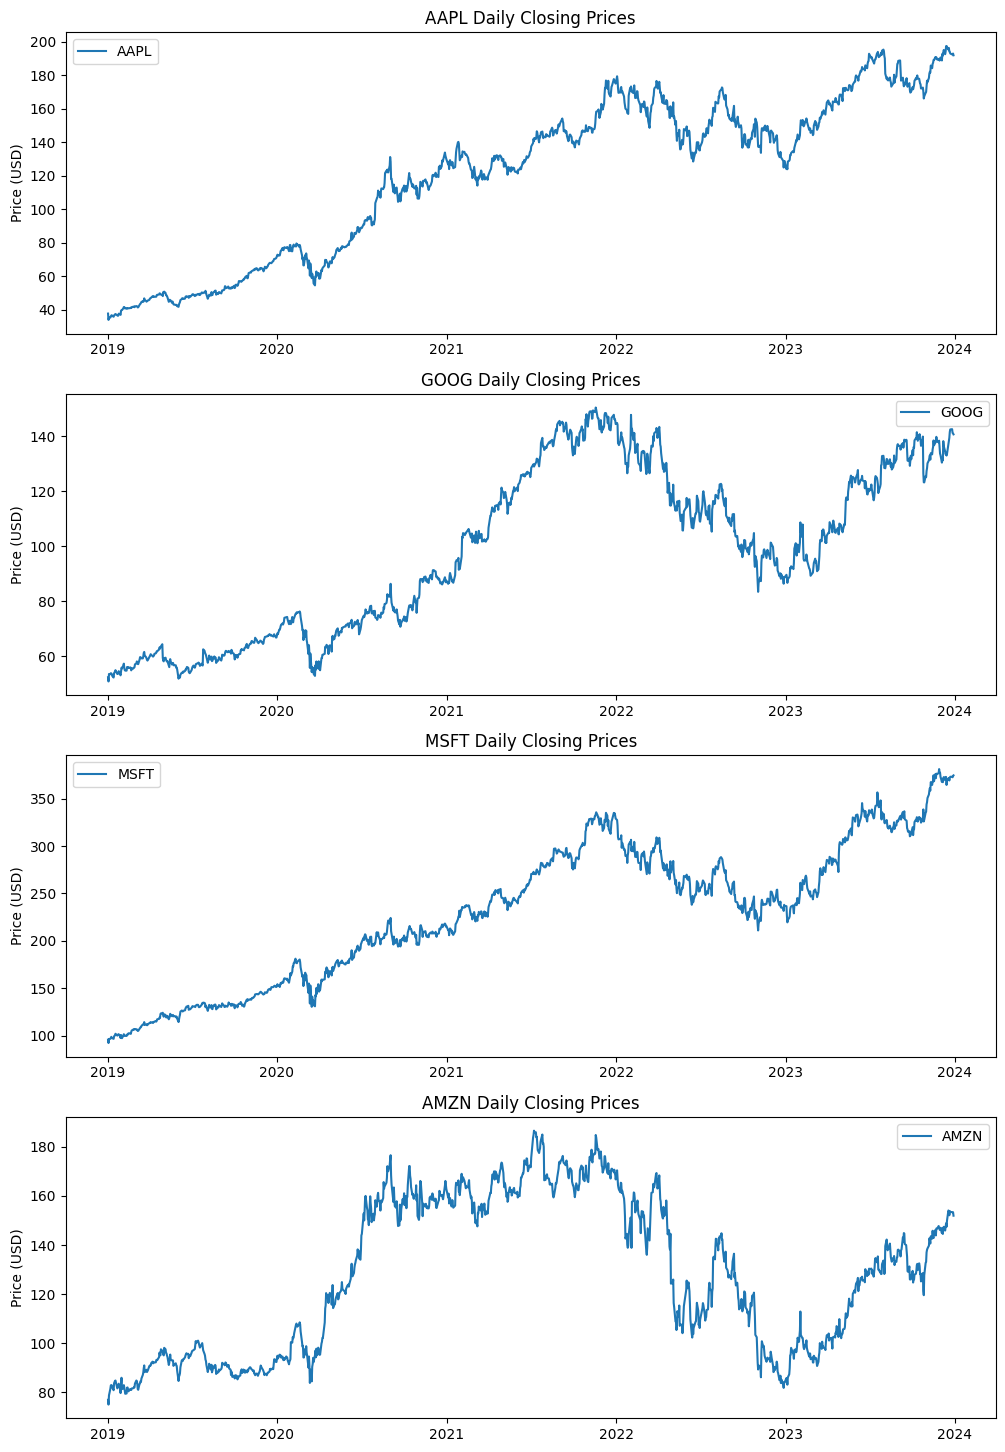

In [8]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=False)

# Plot each stock's daily closing price
for i, ticker in enumerate(historical_data):
    axs[i].plot(historical_data[ticker].index, historical_data[ticker]['Close'], label=ticker)
    axs[i].set_title(f'{ticker} Daily Closing Prices')
    axs[i].set_ylabel('Price (USD)')
    axs[i].legend()

In [9]:
for i, ticker in enumerate(historical_data):
    last_idx = len(historical_data[ticker]) - 1
    first_close_price = historical_data[ticker].iloc[0]['Close']
    last_close_price = historical_data[ticker].iloc[last_idx]['Close']
    print(f"{ticker}\n--------------------------------------------------------------")
    print(f"Close price on day {historical_data[ticker].index[0].date()} was: {first_close_price}")
    print(f"Close price on day {historical_data[ticker].index[last_idx].date()} was: {last_close_price}")
    print(f"Raw difference: {last_close_price - first_close_price}")
    print(f"Percentage difference: {100 * (last_close_price - first_close_price) / first_close_price}%\n")

AAPL
--------------------------------------------------------------
Close price on day 2019-01-02 was: 37.79377365112305
Close price on day 2023-12-29 was: 192.02418518066406
Raw difference: 154.23041152954102
Percentage difference: 408.084180619942%

GOOG
--------------------------------------------------------------
Close price on day 2019-01-02 was: 52.23305892944336
Close price on day 2023-12-29 was: 140.76980590820312
Raw difference: 88.53674697875977
Percentage difference: 169.50327779645374%

MSFT
--------------------------------------------------------------
Close price on day 2019-01-02 was: 95.67345428466797
Close price on day 2023-12-29 was: 374.6700744628906
Raw difference: 278.99662017822266
Percentage difference: 291.6134075687209%

AMZN
--------------------------------------------------------------
Close price on day 2019-01-02 was: 76.95649719238281
Close price on day 2023-12-29 was: 151.94000244140625
Raw difference: 74.98350524902344
Percentage difference: 97.43622434

In [10]:
'''
What other things to look at, for looking at the "change in price over time"?
    like Max drawdown?

close vs adjusted close?

realistically make money with this?

what use cases for lstm currently in industry

lstm vs other time series models

derivative pricing

buyside team

mock interviews

how accurate are theories in financial engineering?
brownian motion, log returns, randomness in modeling real world

purposes of moving average? which kinds?


'''

'\nWhat other things to look at, for looking at the "change in price over time"?\n    like Max drawdown?\n\n\n'

### Let's look at Volume too

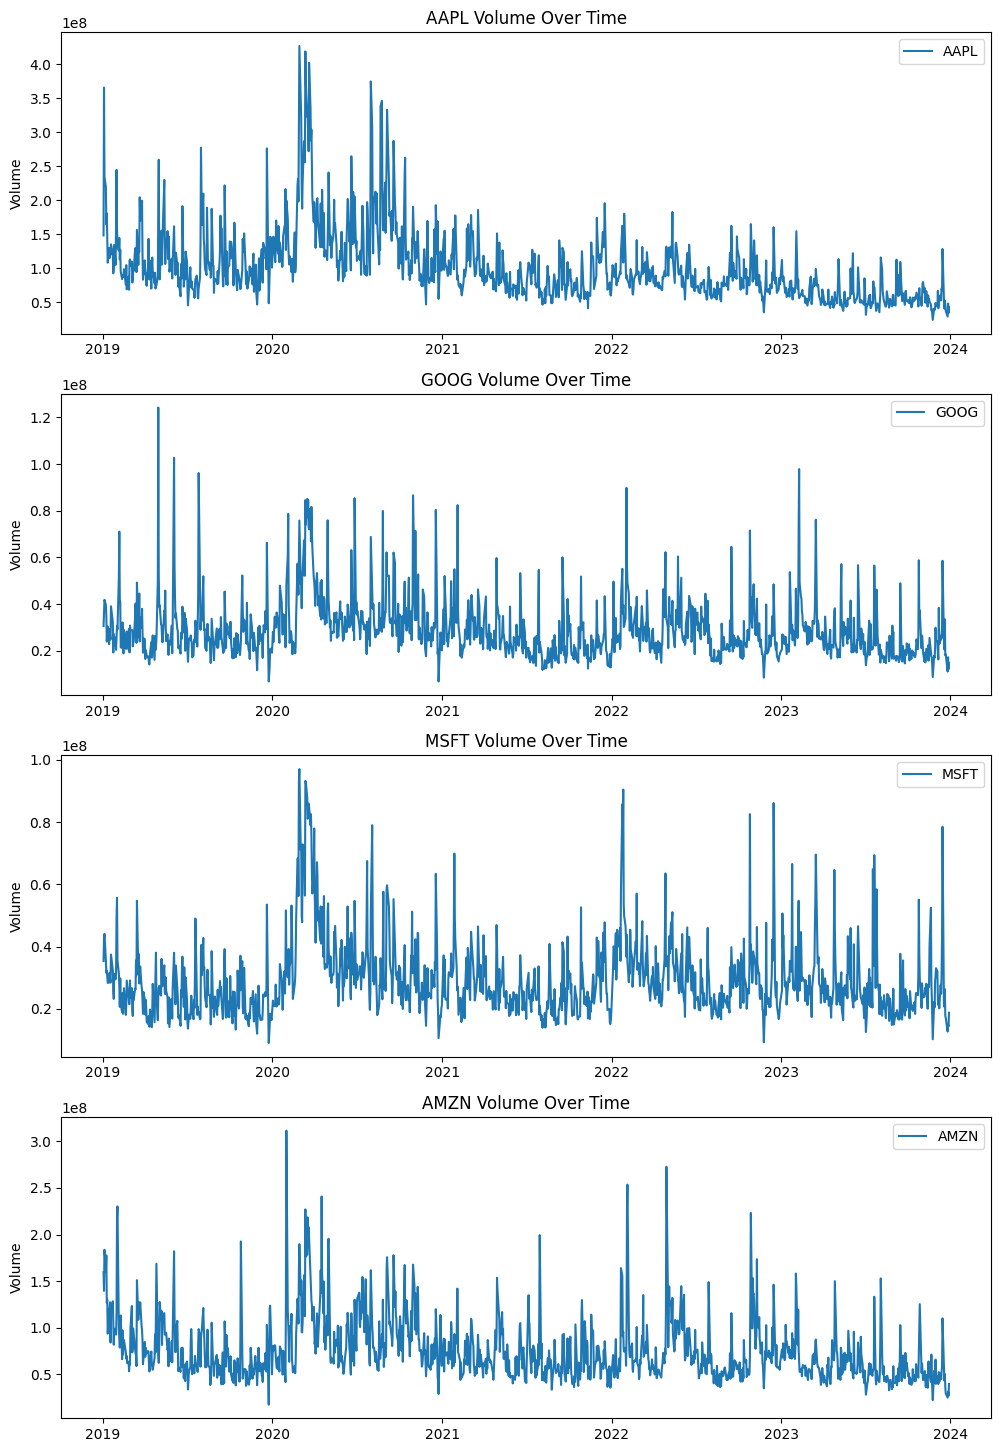

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=False)

for i, ticker in enumerate(historical_data):
    axs[i].plot(historical_data[ticker].index, historical_data[ticker]['Volume'], label=ticker)
    axs[i].set_title(f'{ticker} Volume Over Time')
    axs[i].set_ylabel('Volume')
    axs[i].legend()

### Daily return of the stock on average

In [24]:
for ticker in ticker_symbols:
    historical_data[ticker]['Daily Return'] = historical_data[ticker]['Close'].pct_change()

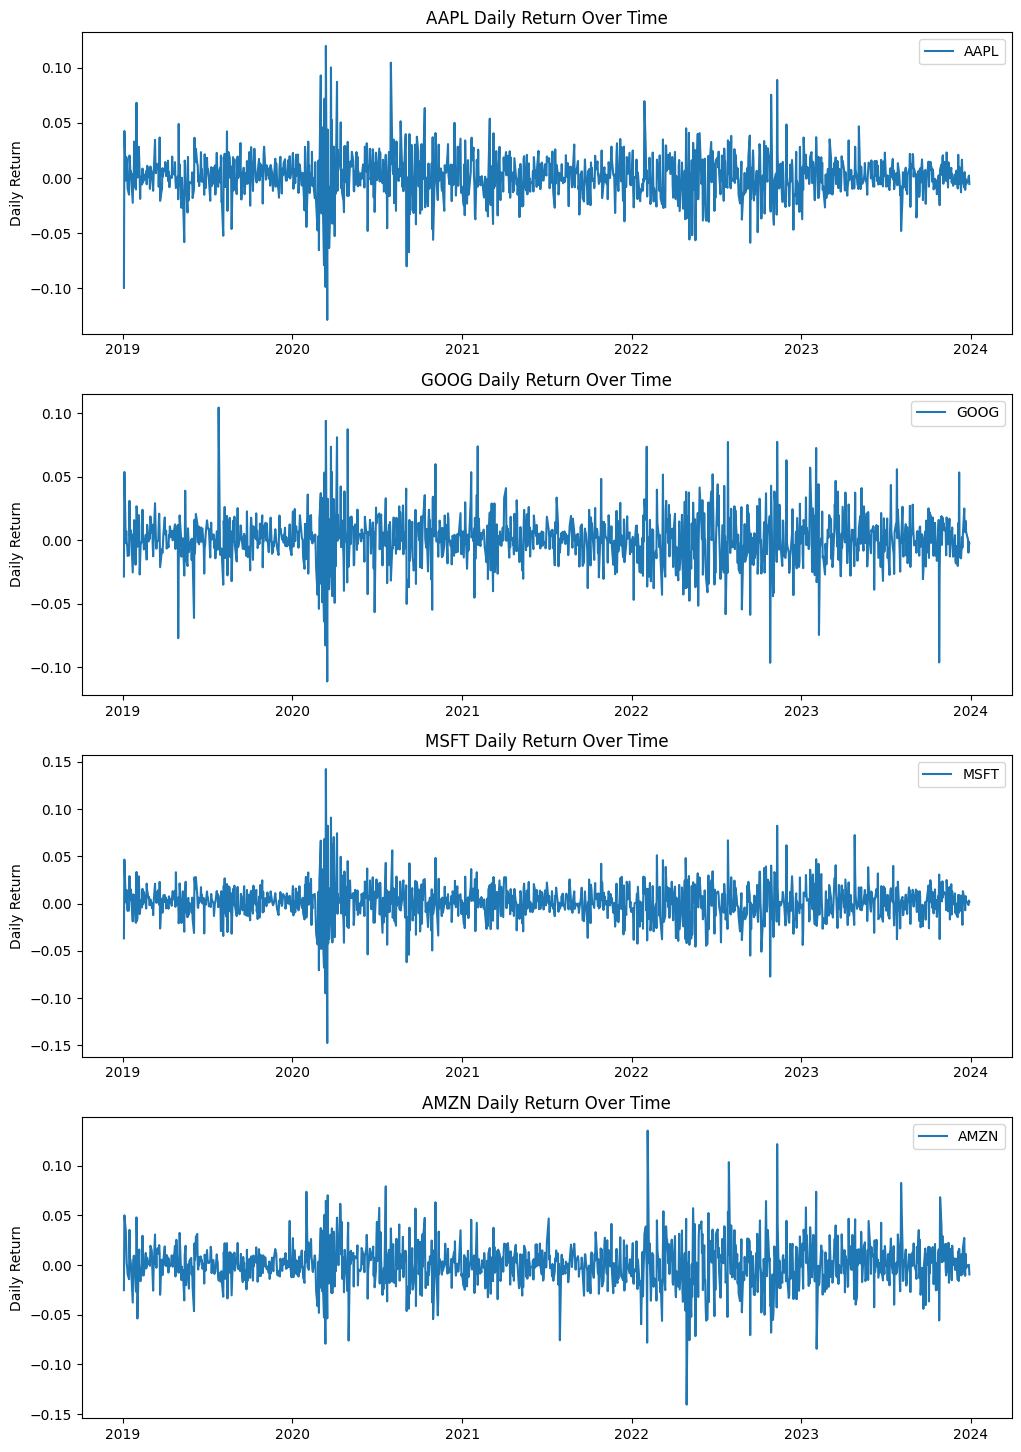

In [25]:
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=False)

for i, ticker in enumerate(historical_data):
    axs[i].plot(historical_data[ticker].index, historical_data[ticker]['Daily Return'], label=ticker)
    axs[i].set_title(f'{ticker} Daily Return Over Time')
    axs[i].set_ylabel('Daily Return')
    axs[i].legend()

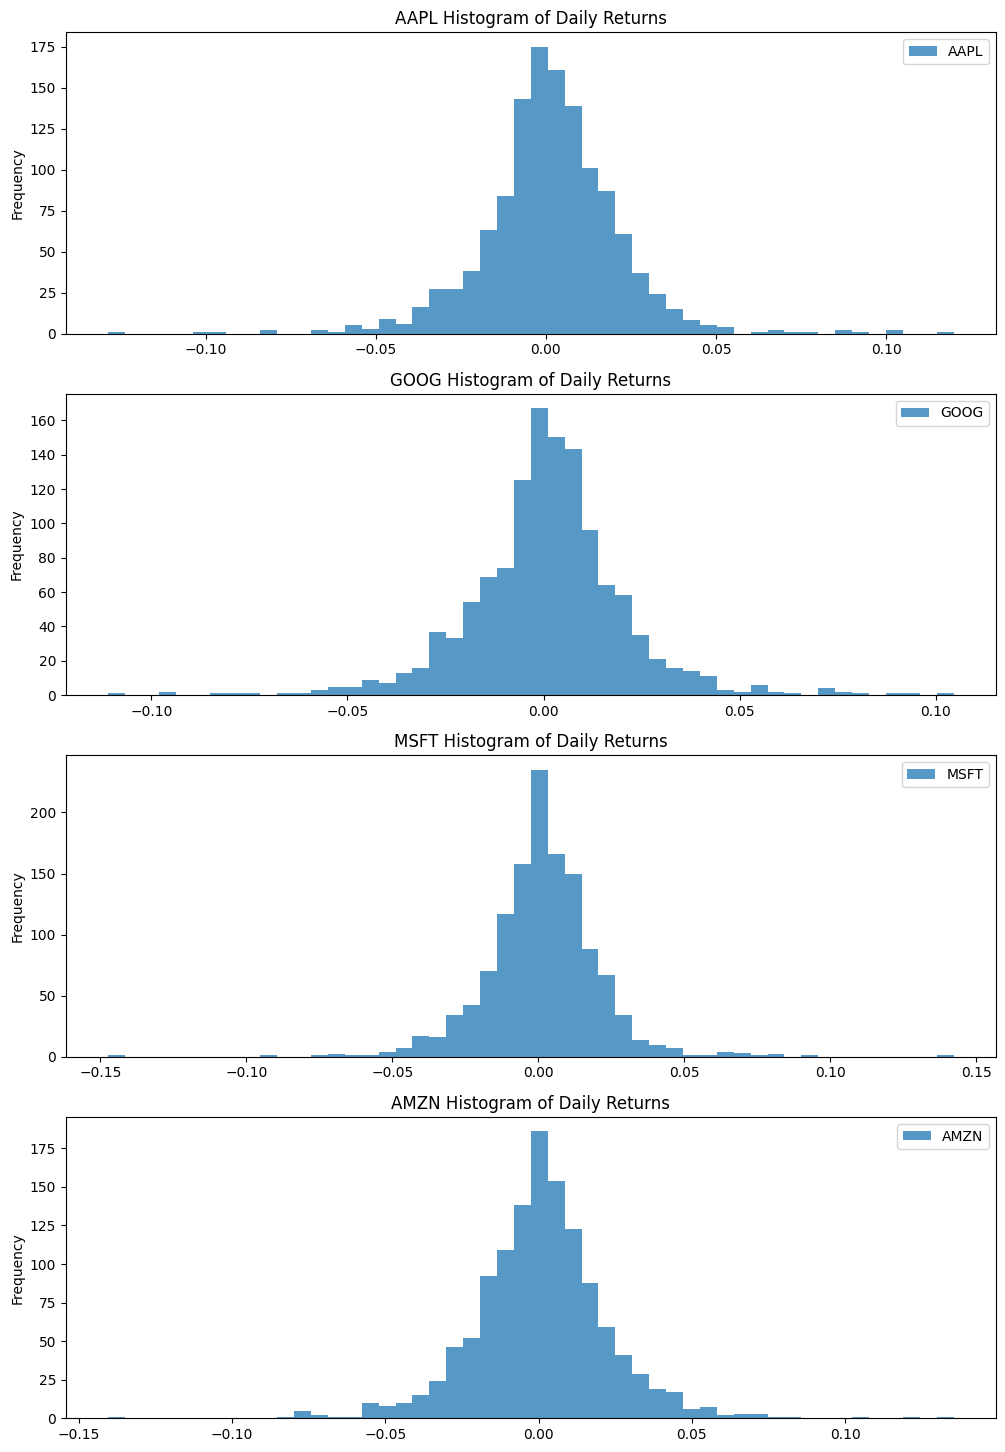

In [26]:
# Let's make histograms
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=False)

for i, ticker in enumerate(historical_data):
    axs[i].hist(historical_data[ticker]['Daily Return'], bins=50, alpha=0.75, label=ticker)
    axs[i].set_title(f'{ticker} Histogram of Daily Returns')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

In [27]:
# Let's view average daily return for each stock
for i, ticker in enumerate(historical_data):
    print(f"{ticker}\n--------------------------------------------------------------")
    print(f"Average daily return: {historical_data[ticker]['Daily Return'].mean()}\n")

AAPL
--------------------------------------------------------------
Average daily return: 0.0015001222757594333

GOOG
--------------------------------------------------------------
Average daily return: 0.0009899145902050087

MSFT
--------------------------------------------------------------
Average daily return: 0.0012710117932041697

AMZN
--------------------------------------------------------------
Average daily return: 0.0007871431828351665



### Let's look at moving averages

In [28]:
ma_periods = [10, 20, 50, 200]
for ma_period in ma_periods:
    for ticker in ticker_symbols:
        historical_data[ticker][f"{ma_period}-day MA"] = historical_data[ticker]['Close'].rolling(ma_period).mean()

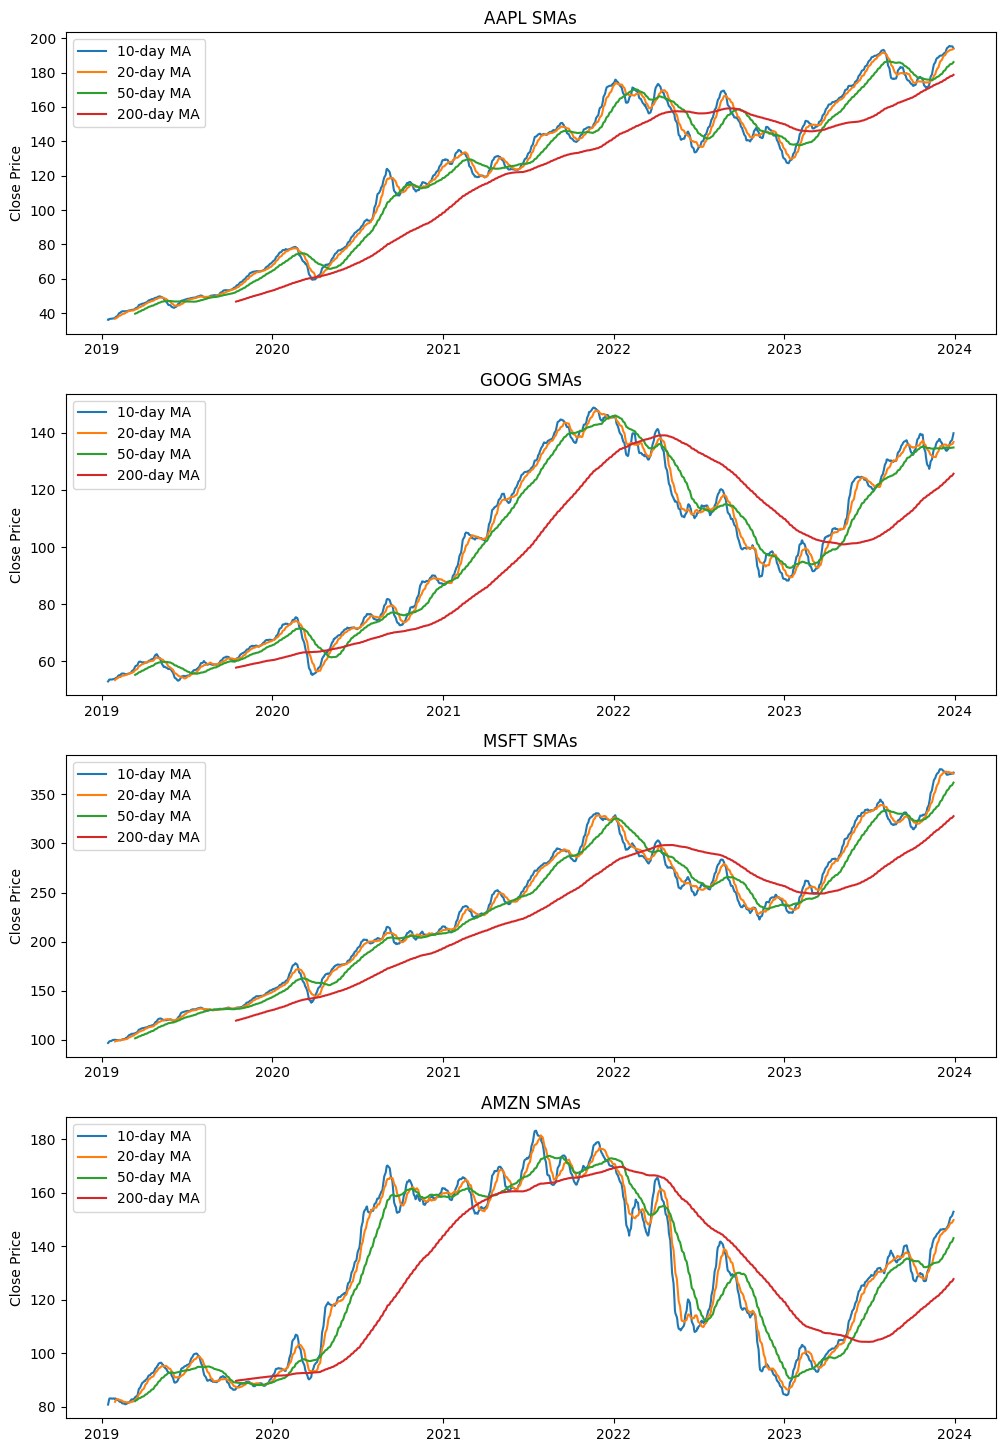

In [31]:
fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=False)

for i, ticker in enumerate(historical_data):
    for ma_period in ma_periods:
        axs[i].plot(historical_data[ticker].index, historical_data[ticker][f"{ma_period}-day MA"], label=f'{ma_period}-day MA')
    axs[i].set_title(f'{ticker} SMAs')
    axs[i].set_ylabel('Close Price')
    axs[i].legend()

### What was the correlation between different stocks?